# extract site data from DeepMIP models

This notebook finds and displays all available DeepMIP model data at a user-defined location. You can either run the notebook along the code in the Jupyter Notebook environment or click on the `Voilà` button at the top for a dashboard view.

**Minimum input:** The variable name you want to process and the present-day latitude (between -90.0 and 90.0) and longitude (between -180.0 and 180.0) of your site. The paleolocation is derived internally from the Herold et al. (2014) paleogeography to be consistent with the model land-sea mask.

**Optional input:** You can specify a label for the site name and a range of reconstructed proxy values to be displayed along the model results.

**Output:**
The following mean metrics are calculated from climatological monthly mean data: *annual*, *monthly minimum*, *monthly maximum*, *December to February*, *March to May*, *June to August* and *September to November*. 
- Figure 1: Early Eocene (55Ma) paleogeographic map with the rotated site in equirectangular and orthographic projection. The coastlines and hollow circles on the maps indicate the present-day geography for reference.
- Figure 2: Boxplots of simulated values at the paleolocation grouped by experiment (i.e. increasing CO2). Pre-industrial values (at the modern location) are shown to indicate intermodel variability. Boxplots describe distribution of data abesd on: minimum, first quartile, median, third quartile, maximum and outliers.
- Table 3: Overview of calculated metrics for each available model simulation.


Instructions on how to download and run the python code locally can be found at:
https://github.com/sebsteinig/DeepMIP_model_database_notebooks.


In [62]:
work_dir       = './'
data_dir       = work_dir + 'DeepMIP-Eocene/User_Model_Database_v1.0/'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
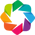

In [73]:
# load packages
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
import ipywidgets as widgets
import base64 
import geoviews as gv
import geoviews.feature as gf


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from netCDF4 import Dataset
from pathlib import Path
from matplotlib import gridspec
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy import crs
from geoviews import opts
from IPython.display import display, HTML
from itables import show

# dictionaries containing info about DeepMIP models and variables
from deepmipModelDict import deepmipModelDict
from deepmipVariableDict import deepmipVariableDict

mpl.rcParams["figure.dpi"] = 300
gv.extension('bokeh')

In [68]:
def getSiteData(variable, modernLat, modernLon, siteName='', showProxy='false', proxyLabel='', proxyMin='', proxyMax=''):
    
## step 1: find paleoposition for DeepMIP model geography   

    # open Herold et al. (2014) rotation file
    rotationFile = xr.open_dataset(work_dir + 'LatLon_PD_55Ma_Herold2014.nc') 
    # 1. coarse approximation: look up paleolocation for modern coordinates in rotation file
    paleoLat = rotationFile.LAT.sel(latitude=modernLat, longitude=modernLon, method='nearest').values
    paleoLon = rotationFile.LON.sel(latitude=modernLat, longitude=modernLon, method='nearest').values
    # 2. fine approximation: add delta between modern selected and rotation grid coordinates back to paleolocation
    deltaLat = modernLat - rotationFile.latitude.sel(latitude=modernLat, method='nearest').values
    deltaLon = modernLon - rotationFile.longitude.sel(longitude=modernLon, method='nearest').values
    paleoLat += deltaLat
    paleoLon += deltaLon
    
## step 2: load model data at paleoposition

    # allocate empty list to store results for all models
    siteDataList = []

    expts = ['piControl', 'deepmip_sens_1xCO2', 'deepmip_sens_2xCO2', 'deepmip_stand_3xCO2', 'deepmip_sens_4xCO2', 'deepmip_stand_6xCO2', 'deepmip_sens_9xCO2']
    exptLabels = ['piControl', 'DeepMIP_1x', 'DeepMIP_2x', 'DeepMIP_3x', 'DeepMIP_4x', 'DeepMIP_6x', 'DeepMIP_9x']

    # loop over all models and experiments
    for modelCount, model in enumerate(deepmipModelDict.keys()):
        for expCount, exp in enumerate(expts):

            # construct filename following the DeepMIP convention
            modelFile = data_dir + deepmipModelDict[model]['group'] + '/' + model + '/' + exp + '/' + deepmipModelDict[model]['versn'] + \
                        '/' + model + '-' + exp + '-' + variable + '-' + deepmipModelDict[model]['versn'] + '.mean.nc'

            # load data if file for model/experiment combination exists
            if Path(modelFile).exists():
                modelDataset = xr.open_dataset(modelFile, decode_times=False)

                # get coordinate names
                for coord in modelDataset.coords:
                    if coord in ['lat', 'latitude']:
                        latName = coord
                    elif coord in ['lon', 'longitude']:
                        lonName = coord

                if exp == 'piControl':
                    lookupLat = modernLat
                    lookupLon = modernLon
                else:
                    lookupLat = paleoLat
                    lookupLon = paleoLon              

                # check for minimum model longitude
                minModelLon = np.amin(modelDataset.coords[lonName].values)
                if minModelLon >= 0.0 and lookupLon < 0.0:
                    # convert lookupLon from [-180:180] to [0:360]
                    lookupLon = lookupLon + 360.0 

                varData = getattr(modelDataset, variable)
                if variable == 'tas':
                    # convert from Kelvin to Celsius
                    siteData = varData.sel(**{latName: lookupLat}, **{lonName: lookupLon}, method='nearest').values - 273.15
                elif variable == 'pr':
                    # convert from kg m-2 s-1 to mm/day
                    siteData = varData.sel(**{latName: lookupLat}, **{lonName: lookupLon}, method='nearest').values * 86400.
                else:
                    siteData = varData.sel(**{latName: lookupLat}, **{lonName: lookupLon}, method='nearest').values

                # store results for individual metrics in a dictionary
                siteDataList.append(dict(model = model, 
                                         experiment = exptLabels[expCount], 
                                         annualMean = np.mean(siteData), 
                                         monthlyMin = np.min(siteData), 
                                         monthlyMax = np.max(siteData), 
                                         DJF = np.mean(siteData[[11,0,1]]), 
                                         MAM = np.mean(siteData[[2,3,4]]), 
                                         JJA = np.mean(siteData[[5,6,7]]), 
                                         SON = np.mean(siteData[[8,9,10]]) ))


    # convert dictionary to Pandas dataframe for easier handling and plotting  
    df = pd.DataFrame(siteDataList)
    
## step 3: plot results

    # increase fontsize
    sns.set_context("notebook", font_scale=1.5)

    ### 3.1 paleogeography with rotated site
    
    # open Herold et al. (2014) paleogeography
    geography = xr.open_dataset(work_dir + 'herold_etal_eocene_topo_1x1.nc').topo
    lons = xr.open_dataset(work_dir + 'herold_etal_eocene_topo_1x1.nc').lon
    lats = xr.open_dataset(work_dir + 'herold_etal_eocene_topo_1x1.nc').lat

    # add cyclic longitude for plotting
    geography, lonsc = add_cyclic_point(geography, lons)

    levels = np.linspace(-5400,5400, num=21)
    contours = gv.FilledContours((lonsc, lats, geography), crs=crs.PlateCarree(central_longitude=0))
    
    ### 3.2 boxplots of model data at paleolocation
    
    # change dataframe from wide (9 columns) to long (3 columns) format to use hue method in seaborn boxplot
    dfMelt = pd.melt(df, id_vars=['experiment'], value_vars=['annualMean','monthlyMin','monthlyMin','monthlyMax','DJF','MAM','JJA','SON'])
    
    # define figure layout first
    fig2, axes = plt.subplots(2, 1, figsize=(13, 16))

    # boxplot with seaborn (https://seaborn.pydata.org/generated/seaborn.boxplot.html)
    ax3 = sns.boxplot(data=dfMelt, x="experiment", y="value", hue='variable', hue_order=['annualMean', 'monthlyMin', 'monthlyMax'], order=exptLabels, palette = ['tab:green','tab:blue','tab:red'], linewidth=2.0, ax=axes[0])
    ax3 = sns.swarmplot(data=dfMelt, x="experiment", y="value", hue='variable', hue_order=['annualMean', 'monthlyMin', 'monthlyMax'], order=exptLabels, palette = ['tab:green','tab:blue','tab:red'], linewidth=1.5, edgecolor='black', size=5, dodge=True, ax=axes[0])

    ax4 = sns.boxplot(data=dfMelt, x="experiment", y="value", hue='variable', hue_order=['DJF', 'MAM', 'JJA', 'SON'], order=exptLabels, palette = ['tab:blue', 'tab:orange', 'tab:green','tab:red'], linewidth=2.0, ax=axes[1])
    ax4 = sns.swarmplot(data=dfMelt, x="experiment", y="value", hue='variable', hue_order=['DJF', 'MAM', 'JJA', 'SON'], order=exptLabels, palette = ['tab:blue', 'tab:orange', 'tab:green','tab:red'], linewidth=1.5, edgecolor='black', size=5, dodge=True, ax=axes[1])

    # add optional proxy estimates as reference
    if (showProxy):
        if proxyMin != '':
            ax3.axhline(proxyMin, ls='--', color='lightcoral', zorder=0.)
            ax4.axhline(proxyMin, ls='--', color='lightcoral', zorder=0.)
        if proxyMax != '':
            ax3.axhline(proxyMax, ls='--', color='lightcoral', zorder=0.)
            ax4.axhline(proxyMax, ls='--', color='lightcoral', zorder=0.) 
        if proxyMin != '' and proxyMax != '':
            ax3.axhspan(proxyMin, proxyMax, facecolor='lightcoral', alpha=0.4, zorder=0.)
            ax4.axhspan(proxyMin, proxyMax, facecolor='lightcoral', alpha=0.4, zorder=0.)
            ax3.text(0.5, proxyMax, proxyLabel, color='lightcoral', verticalalignment='bottom')
            ax4.text(0.5, proxyMax, proxyLabel, color='lightcoral', verticalalignment='bottom')


    # modify legends and axes
    if (siteName != ''):
        titleString = 'DeepMIP ' + deepmipVariableDict[variable]['longname'] + ' for "' + siteName + '": LAT = ' + str(np.round(paleoLat, 1)) + ', LON = ' + str(np.round(paleoLon, 1)) 
    else:
        titleString = 'DeepMIP ' + deepmipVariableDict[variable]['longname'] + ' at: LAT = ' + str(np.round(paleoLat, 1)) + ', LON = ' + str(np.round(paleoLon, 1)) 
    yLabel = deepmipVariableDict[variable]['label']

    handles, labels = ax3.get_legend_handles_labels()
    ax3.legend(handles[0:3], labels[0:3], fontsize='16');
    ax3.set(title = titleString, xlabel='', ylabel=yLabel);
    [ax3.axvline(x, color = 'gray', linestyle='-', linewidth=0.5, zorder=0.) for x in [0.5,1.5,2.5,3.5,4.5,5.5]]

    handles2, labels2 = ax4.get_legend_handles_labels()
    ax4.legend(handles2[0:4], labels2[0:4], fontsize='16');
    ax4.set(title = titleString, xlabel='', ylabel=yLabel);
    [ax4.axvline(x, color = 'gray', linestyle='-', linewidth=0.5, zorder=0.) for x in [0.5,1.5,2.5,3.5,4.5,5.5]]

    plt.tight_layout()
    plt.show()
    
    # output values as table
    pd.set_option('precision', 1)
    display(df)

#    # when working locally, display a download link for a dataframe as csv from within a Jupyter notebook
#    df.to_csv('DeepMIP_point_data.csv', index=False)
#    from IPython.display import FileLink
#    display(FileLink('DeepMIP_point_data.csv'))
        
    return (contours * gf.coastline).opts(
    opts.FilledContours(levels=levels, line_alpha=0.0, cmap='cmo.topo', color_levels=20,
                    colorbar=True, width=900, height=450, projection=ccrs.PlateCarree()))

In [65]:
# define interactive widgets
style = {'description_width': '150px'}
layout = {'width': '400px'}

varSelectDropdown = widgets.Dropdown(
    options=[('near-surface air temperature','tas'), ('precipitation','pr')],
    value='tas',
    description='variable:',
    style=style,
    layout=layout
)

latSelectText = widgets.BoundedFloatText(
    value=-43.1,
    min=-90.0,
    max=90.0,
    step=0.1,
    description='modern latitude:',
    style=style,
    layout=layout
)

lonSelectText = widgets.BoundedFloatText(
    value=172.7,
    min=-180.0,
    max=180.0,
    step=0.1,
    description='modern longitude:',
    style=style,
    layout=layout
)

labelSelectText = widgets.Text(
    value='Mid-Waipara River',
    description='site name (OPTIONAL):',
    style=style,
    layout=layout
)

proxyMinSelectText = widgets.FloatText(
    value=18.9,
    description='proxy minimum:',
    style=style,
    layout=layout
)

proxyMaxSelectText = widgets.FloatText(
    value=21.5,
    description='proxy maximum:',
    style=style,
    layout=layout
)

proxyToggleSelect = widgets.Checkbox(
    value=True,
    description='compare to proxy data',
    style=style,
    layout=layout
)

proxyLabelSelectText = widgets.Text(
    value='EECO MBT\'-CBT',
    description='proxy label:',
    style=style,
    layout=layout
)

def update_proxy_comparison(proxyToggleSelect):
    if proxyToggleSelect.new == True:
        proxyLabelSelectText.disabled=False
        proxyMinSelectText.disabled=False
        proxyMaxSelectText.disabled=False
    else:
        proxyLabelSelectText.disabled=True
        proxyMinSelectText.disabled=True
        proxyMaxSelectText.disabled=True    

proxyToggleSelect.observe(update_proxy_comparison, 'value')

In [69]:
# EITHER run function `getSiteData` with interactive widgets:
widgets.interactive(getSiteData, {'manual': True, 'manual_name' : 'get model data'}, variable = varSelectDropdown, modernLat = latSelectText, modernLon=lonSelectText, siteName=labelSelectText, showProxy=proxyToggleSelect, proxyLabel=proxyLabelSelectText, proxyMin=proxyMinSelectText, proxyMax=proxyMaxSelectText)

# OR you can also use it as a standalone function to start your own analysis with:
#
# siteData = getSiteData( variable, modernLat, modernLon, siteName, showProxy, proxyLabel, proxyMin, proxyMax)
#
# with a minimum argument list as:
# siteData = getSiteData('tas', -43.1, 172.7)
#
# or
# siteData = getSiteData('tas', -43.1, 172.7, siteName='Mid-Waipara River', showProxy='true', proxyLabel='EECO MBT\'-CBT', proxyMin=18.9, proxyMax=21.5)


interactive(children=(Dropdown(description='variable:', layout=Layout(width='400px'), options=(('near-surface …

In [71]:
geography = xr.open_dataset(work_dir + 'herold_etal_eocene_topo_1x1.nc').topo
lons = xr.open_dataset(work_dir + 'herold_etal_eocene_topo_1x1.nc').lon
lats = xr.open_dataset(work_dir + 'herold_etal_eocene_topo_1x1.nc').lat

# add cyclic longitude for plotting
geography, lonsc = add_cyclic_point(geography, lons)

levels = np.linspace(-5400,5400, num=21)
contours = gv.FilledContours((lonsc, lats, geography), crs=crs.PlateCarree(central_longitude=0))

(contours * gf.coastline).opts(
opts.FilledContours(levels=levels, line_alpha=0.0, cmap='cmo.topo', color_levels=20,
                    colorbar=True, width=900, height=450, projection=ccrs.PlateCarree()))

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Coastline.I      :Feature   [Longitude,Latitude]

In [85]:
gv.__version__

'0.0.0+g33876c88-gitarchive'